In [ ]:
from local.test import *
from local.data.all import *
from local.notebook.showdoc import show_doc

from local.vision.core import *
from local.vision.augment import *

# Data block examples

> Examples for computer vision, NLP, and tabular

## Image classification

### MNIST

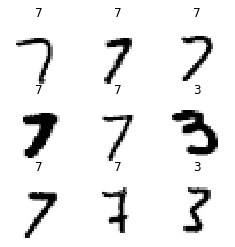

In [ ]:
mnist = DataBlock(types=(PILImageBW, Category), 
                  get_items=get_image_files, 
                  splitter=GrandparentSplitter(),
                  get_y=parent_label)

dbunch = mnist.databunch(untar_data(URLs.MNIST_TINY))
dbunch.show_batch(max_n=9, figsize=(4,4))

### Pets

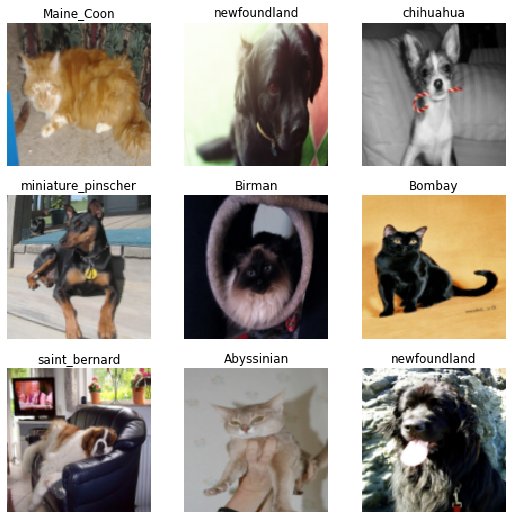

In [ ]:
pets = DataBlock(types=(PILImage, Category), 
                 get_items=get_image_files, 
                 splitter=RandomSplitter(),
                 get_y=RegexLabeller(pat = r'/([^/]+)_\d+.jpg$'))

dbunch = pets.databunch(untar_data(URLs.PETS)/"images", item_tfms=Resize(128),
                        batch_tfms=aug_transforms())
dbunch.show_batch(max_n=9)

### Multi-label - Planet

In [ ]:
MultiCategory.default_type_tfms = OneHotEncode

In [ ]:
planet_source = untar_data(URLs.PLANET_TINY)
df = pd.read_csv(planet_source/"labels.csv")

In [ ]:
planet = DataBlock(types=(PILImage, MultiCategory),
                   get_x=lambda x:planet_source/"train"/f'{x[0]}.jpg',
                   splitter=RandomSplitter(),
                   get_y=lambda x:x[1].split(' '))

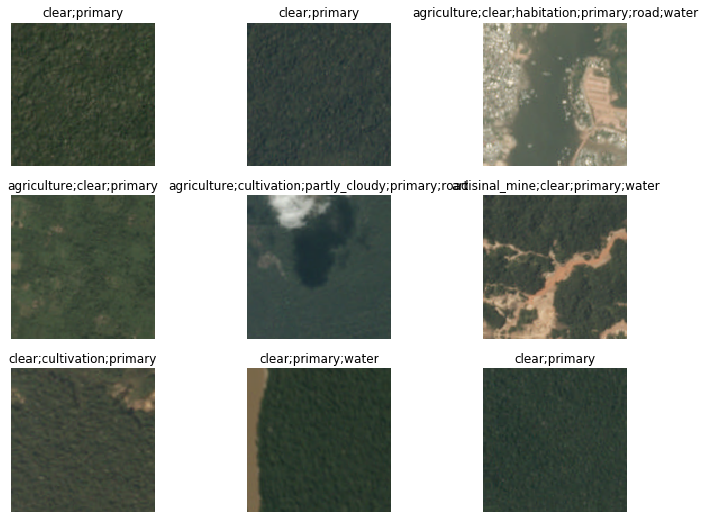

In [ ]:
dbunch = planet.databunch(df.values,
         batch_tfms=aug_transforms(flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))
dbunch.show_batch(max_n=9, figsize=(12,9))

In [ ]:
def _planet_items(x): return (
    f'{planet_source}/train/'+x.image_name+'.jpg', x.tags.str.split())

planet = DataBlock(types=(PILImage,MultiCategory),
                   get_items = _planet_items,
                   splitter = RandomSplitter())

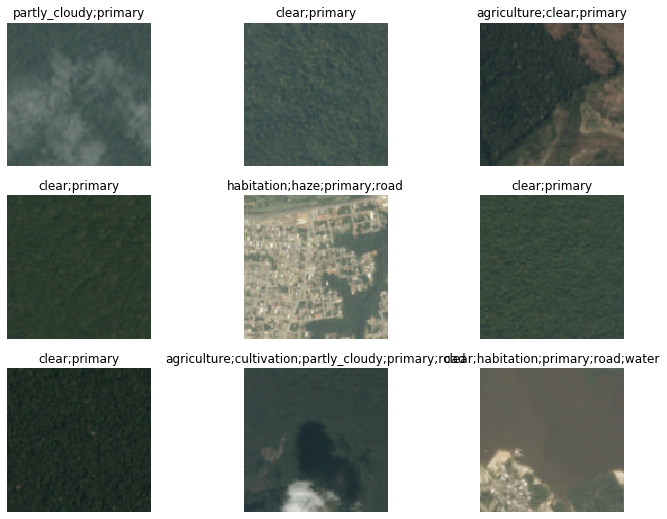

In [ ]:
dbunch = planet.databunch(df, batch_tfms=aug_transforms(
    flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))
dbunch.show_batch(max_n=9, figsize=(12,9))

In [ ]:
class PlanetDataBlock(DataBlock):
    types = PILImage,MultiCategory
    splitter = staticmethod(RandomSplitter())
    def get_items(self, x): return (
        f'{planet_source}/train/' + x.image_name + '.jpg', x.tags.str.split())

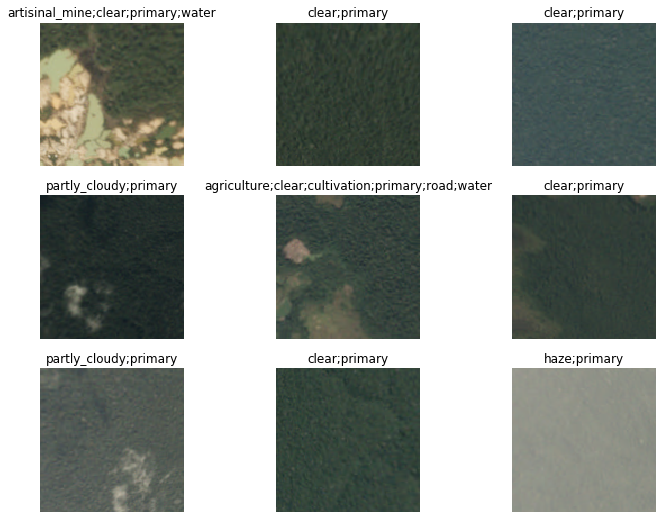

In [ ]:
planet = PlanetDataBlock()
dbunch = planet.databunch(df, batch_tfms=aug_transforms(flip_vert=True))
dbunch.show_batch(max_n=9, figsize=(12,9))

In [ ]:
planet = DataBlock(types=(PILImage,MultiCategory),
                   get_x = lambda o:f'{planet_source}/train/'+o.image_name+'.jpg',
                   get_y = lambda o:o.tags.split(),
                   splitter = RandomSplitter())

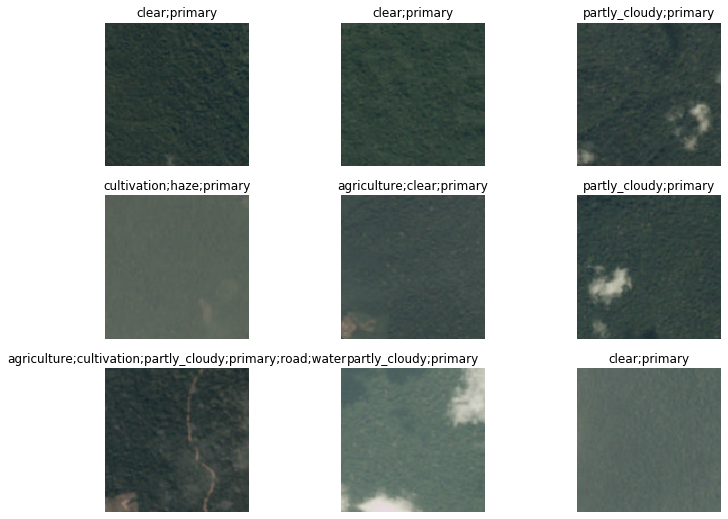

In [ ]:
dbunch = planet.databunch(df, batch_tfms=aug_transforms(
    flip_vert=True, max_lighting=0.1, max_zoom=1.05, max_warp=0.))
dbunch.show_batch(max_n=9, figsize=(12,9))

## Image localization

### Segmentation

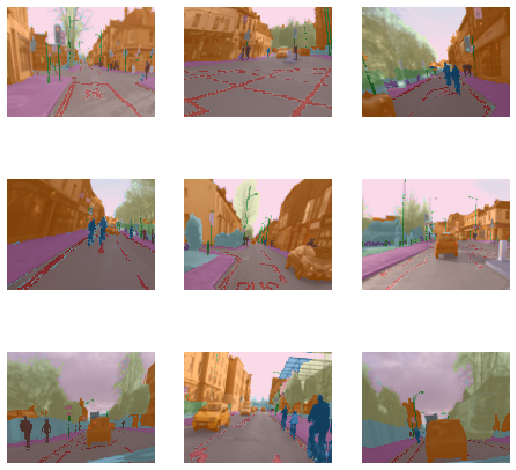

In [ ]:
camvid = DataBlock(types=(PILImage, PILMask),
    get_items=get_image_files,
    splitter=RandomSplitter(),
    get_y=lambda o: untar_data(URLs.CAMVID_TINY)/'labels'/f'{o.stem}_P{o.suffix}')

dbunch = camvid.databunch(untar_data(URLs.CAMVID_TINY)/"images",
                          batch_tfms=aug_transforms())
dbunch.show_batch(max_n=9, vmin=1, vmax=30)

### Points

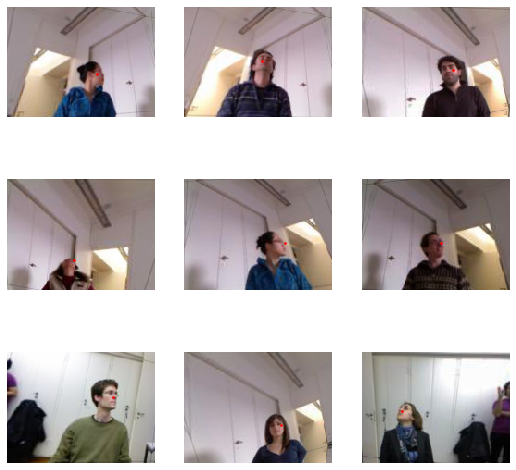

In [ ]:
biwi_source = untar_data(URLs.BIWI_SAMPLE)
fn2ctr = (biwi_source/'centers.pkl').load()

biwi = DataBlock(types=(PILImage, TensorPoint),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=lambda o:fn2ctr[o.name].flip(0))

dbunch = biwi.databunch(biwi_source, batch_tfms=aug_transforms())
dbunch.show_batch(max_n=9)

### Bounding boxes

In [ ]:
coco_source = untar_data(URLs.COCO_TINY)
images, lbl_bbox = get_annotations(coco_source/'train.json')
img2bbox = dict(zip(images, lbl_bbox))

In [ ]:
coco = DataBlock(types=(PILImage, BBox),
                 get_items=get_image_files,
                 splitter=RandomSplitter(),
                 get_y=lambda o: img2bbox[o.name])

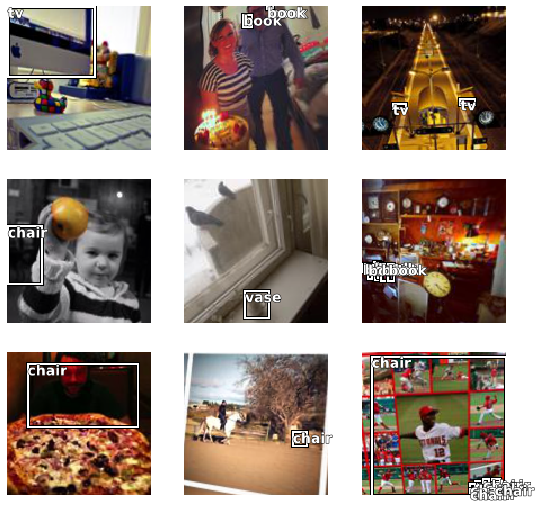

In [ ]:
dbunch = coco.databunch(coco_source, item_tfms=Resize(128),
                        batch_tfms=aug_transforms(), before_batch=bb_pad)
dbunch.show_batch(max_n=9)

### Language model TODO

### Text classification TODO

### Tabular data TODO

In [ ]:
from local.tabular.core import *

In [ ]:
adult_source = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(adult_source/'adult.csv')

In [ ]:
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [Categorify, FillMissing, Normalize]
splits = RandomSplitter()(range_of(df))

In [ ]:
to = TabularPandas(df, procs, cat_names, cont_names, y_names="salary", splits=splits)

In [ ]:
dbch = to.databunch()
dbch.show_batch()

,age,fnlwgt,education-num,workclass,education,marital-status,occupation,relationship,race,age_na,fnlwgt_na,education-num_na,salary
0,19.000000,277974.001691,10.0,Private,Some-college,Never-married,Sales,Own-child,White,False,False,False,<50k
1,34.000000,196385.000280,11.0,Private,Assoc-voc,Married-civ-spouse,Exec-managerial,Husband,White,False,False,False,<50k
2,41.000000,146658.998996,10.0,Self-emp-inc,Some-college,Divorced,Machine-op-inspct,Not-in-family,White,False,False,False,<50k
3,43.000000,165309.000570,9.0,State-gov,HS-grad,Married-civ-spouse,Protective-serv,Husband,White,False,False,False,<50k
4,39.000000,357961.996753,12.0,Local-gov,Assoc-acdm,Never-married,Transport-moving,Not-in-family,White,False,False,False,<50k
5,24.000000,198147.999936,10.0,Private,Some-college,Never-married,Other-service,Own-child,White,False,False,False,<50k
6,32.000000,206609.000526,9.0,Local-gov,HS-grad,Never-married,Other-service,Own-child,White,False,False,False,<50k
7,56.999999,199546.000265,14.0,Local-gov,Masters,Divorced,Other-service,Unmarried,Black,False,False,False,<50k
8,42.000000,109273.002029,10.0,Self-emp-not-inc,Some-college,Never-married,Craft-repair,Unmarried,White,False,False,False,<50k
9,29.000000,53641.996509,11.0,Private,Assoc-voc,Married-civ-spouse,Adm-clerical,Husband,White,False,False,False,<50k


## Export -

In [ ]:
#hide
from local.notebook.export import notebook2script
notebook2script(all_fs=True)

Converted 00_test.ipynb.
Converted 01_core.ipynb.
Converted 01a_utils.ipynb.
Converted 01b_dispatch.ipynb.
Converted 01c_transform.ipynb.
Converted 02_script.ipynb.
Converted 03_torch_core.ipynb.
Converted 03a_layers.ipynb.
Converted 04_dataloader.ipynb.
Converted 05_data_core.ipynb.
Converted 06_data_transforms.ipynb.
Converted 07_data_block.ipynb.
Converted 08_vision_core.ipynb.
Converted 09_vision_augment.ipynb.
Converted 10_pets_tutorial.ipynb.
Converted 11_vision_models_xresnet.ipynb.
Converted 12_optimizer.ipynb.
Converted 13_learner.ipynb.
Converted 13a_metrics.ipynb.
Converted 14_callback_schedule.ipynb.
Converted 14a_callback_data.ipynb.
Converted 15_callback_hook.ipynb.
Converted 15a_vision_models_unet.ipynb.
Converted 16_callback_progress.ipynb.
Converted 17_callback_tracker.ipynb.
Converted 18_callback_fp16.ipynb.
Converted 19_callback_mixup.ipynb.
Converted 21_vision_learner.ipynb.
Converted 22_tutorial_imagenette.ipynb.
Converted 23_tutorial_transfer_learning.ipynb.
Conve